In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

In [3]:
trafico = pd.read_csv('data/traficogt.csv')
trafico.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1701654244858679742,1701654244858679742,https://twitter.com/EmisorasUnidas/status/1701...,2023-09-12 17:49:21+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,"#AHORA Amílcar Montejo, director de Comunicaci...",1,2,...,"{'id': 1701651855212691764, 'id_str': '1701651...",NaN,NaN,NaN,NaN,"<a href=""https://twitter.com"" rel=""nofollow"">T...",https://twitter.com,TweetDeck Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1701651855212691764,1701651855212691764,https://twitter.com/amilcarmontejo/status/1701...,2023-09-12 17:39:52+00:00,"{'id': 372126670, 'id_str': '372126670', 'url'...",es,CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES...,149,78,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
2,2,1701348453916311903,1701348453916311903,https://twitter.com/edgarduarteagui/status/170...,2023-09-11 21:34:15+00:00,"{'id': 100815432, 'id_str': '100815432', 'url'...",es,Camión de arena volteado en el viaducto el pul...,2,1,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
3,3,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",3,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1701216420997017888,1701216420997017888,https://twitter.com/EmisorasUnidas/status/1701...,2023-09-11 12:49:36+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,"#AHORA Amílcar Montejo, director de Comunicaci...",0,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://twitter.com"" rel=""nofollow"">T...",https://twitter.com,TweetDeck Web App,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet


In [4]:
bernardo = pd.read_csv('data/bernardoArevalo.csv')
bernardo.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1702109621899407575,1702109621899407575,https://twitter.com/eltuitdehoy_/status/170210...,2023-09-13 23:58:52+00:00,"{'id': 46561608, 'id_str': '46561608', 'url': ...",es,@AnonGTReloaded @msemillagt @BArevalodeLeon ja...,0,0,...,NaN,NaN,NaN,1.702089e+18,"{'id': 1419402501212811265, 'username': 'AnonG...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1702109505947865192,1702109505947865192,https://twitter.com/totitafuentes/status/17021...,2023-09-13 23:58:24+00:00,"{'id': 1005627722, 'id_str': '1005627722', 'ur...",es,@ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...,0,1,...,NaN,NaN,NaN,1.702056e+18,"{'id': 291888009, 'username': 'ASIERVERA', 'di...","<a href=""http://twitter.com/#!/download/ipad"" ...",http://twitter.com/#!/download/ipad,Twitter for iPad,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",2,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1702109134387134664,1702109134387134664,https://twitter.com/Fernand0483/status/1702109...,2023-09-13 23:56:55+00:00,"{'id': 1512621569834688513, 'id_str': '1512621...",es,@VicZacariasGT @soy_502 @BArevalodeLeon @msemi...,0,0,...,NaN,NaN,NaN,1.701799e+18,"{'id': 84055675, 'username': 'VicZacariasGT', ...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1702108943495926143,1702108943495926143,https://twitter.com/MaxTiger502/status/1702108...,2023-09-13 23:56:10+00:00,"{'id': 891058586, 'id_str': '891058586', 'url'...",es,@Igor_Bitkov No le sigan el juego a este ruso ...,1,0,...,NaN,NaN,NaN,1.701898e+18,"{'id': 707086237753090048, 'username': 'Igor_B...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet


In [5]:
sandra = pd.read_csv('data/sandraTorres.csv')
sandra.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1701686249797345422,1701686249797345422,https://twitter.com/Yeya16155804/status/170168...,2023-09-12 19:56:32+00:00,"{'id': 1213902343311245313, 'id_str': '1213902...",es,@bernardosilvagt @BArevalodeLeon @DrGiammattei...,0,0,...,NaN,NaN,NaN,1.701683e+18,"{'id': 3337026291, 'username': 'bernardosilvag...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1701686065361215632,1701686065361215632,https://twitter.com/Palomin17772524/status/170...,2023-09-12 19:55:48+00:00,"{'id': 1420560045323038720, 'id_str': '1420560...",es,@_awskl @mjcabrerar @BArevalodeLeon @TSEGuatem...,0,0,...,NaN,NaN,NaN,1.701685e+18,"{'id': 390988524, 'username': '_awskl', 'displ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701176209076609121,1701176209076609121,https://twitter.com/iRizhao/status/17011762090...,2023-09-11 10:09:49+00:00,"{'id': 1533663614770421761, 'id_str': '1533663...",en,The 2023 National Race Walking Championship &a...,5,34,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1701684889081307215,1701684889081307215,https://twitter.com/_awskl/status/170168488908...,2023-09-12 19:51:07+00:00,"{'id': 390988524, 'id_str': '390988524', 'url'...",es,@Palomin17772524 @mjcabrerar @BArevalodeLeon @...,1,0,...,NaN,NaN,NaN,1.701684e+18,"{'id': 1420560045323038720, 'username': 'Palom...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
4,4,1701684719815970972,1701684719815970972,https://twitter.com/Mr_andrew89/status/1701684...,2023-09-12 19:50:27+00:00,"{'id': 454924874, 'id_str': '454924874', 'url'...",es,@ASolaresM @Mike051270 @BArevalodeLeon Otro es...,0,0,...,NaN,NaN,NaN,1.701329e+18,"{'id': 310913844, 'username': 'ASolaresM', 'di...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet


## Limpieza de Datos

In [6]:
# Convertir todo a minuscula
trafico['rawContent'] = trafico['rawContent'].str.lower()
bernardo['rawContent'] = bernardo['rawContent'].str.lower()
sandra['rawContent'] = sandra['rawContent'].str.lower()
# Quitar caracteres especiales
trafico['rawContent'] = trafico['rawContent'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
bernardo['rawContent'] = bernardo['rawContent'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
sandra['rawContent'] = sandra['rawContent'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
# Quitar links
trafico['rawContent'] = trafico['rawContent'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))
bernardo['rawContent'] = bernardo['rawContent'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))
sandra['rawContent'] = sandra['rawContent'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))
# Quitar emoticones
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

trafico['rawContent'] = trafico['rawContent'].apply(lambda x: emoji_pattern.sub(r'', x))
bernardo['rawContent'] = bernardo['rawContent'].apply(lambda x: emoji_pattern.sub(r'', x))
sandra['rawContent'] = sandra['rawContent'].apply(lambda x: emoji_pattern.sub(r'', x))
# Quitar signos de puntuacion
trafico['rawContent'] = trafico['rawContent'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
bernardo['rawContent'] = bernardo['rawContent'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
sandra['rawContent'] = sandra['rawContent'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
# Quitar saltos de linea
trafico['rawContent'] = trafico['rawContent'].apply(lambda x: re.sub(r'[\n]', '', x))
bernardo['rawContent'] = bernardo['rawContent'].apply(lambda x: re.sub(r'[\n]', '', x))
sandra['rawContent'] = sandra['rawContent'].apply(lambda x: re.sub(r'[\n]', '', x))


In [7]:
trafico['rawContent']

0        ahora amlcar montejo director de comunicacin d...
1        conductora que se neg a movilizar vehculo es m...
2        camin de arena volteado en el viaducto el pult...
3        paciente de  aos dolor lumbar de  ao tras cada...
4        ahora amlcar montejo director de comunicacin d...
                               ...                        
12626    alguien sabe que paso en la av z llevo  minuto...
12627    pregunta sera para amilcarmontejo los ineficie...
12628    fuerte congestionamiento en diagonal  provocad...
12629    don amilcarmontejo los motoristas aqu en la ca...
12630    traficogt tome sus precauciones bus urbano con...
Name: rawContent, Length: 12631, dtype: object

In [8]:
nltk.download('stopwords')
stopwordsES = stopwords.words('spanish')
stopwordsEN = stopwords.words('english')

def remove_stopwords(text):
    words = text.split()
    clean_words = [word for word in words if word not in stopwordsES]
    clean_words = [word for word in clean_words if word not in stopwordsEN]
    return " ".join(clean_words)

trafico['rawContent'] = trafico['rawContent'].apply(lambda x: remove_stopwords(x))
bernardo['rawContent'] = bernardo['rawContent'].apply(lambda x: remove_stopwords(x))
sandra['rawContent'] = sandra['rawContent'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Ejercicio 1

### Ejercicio 2

#### Analisis de Bernanrdo

In [9]:

total_tweets = len(bernardo)

# Estadísticas básicas para respuestas, retweets y favoritos
descriptive_stats = bernardo[['replyCount', 'retweetCount', 'likeCount']].describe()

print("Tweets totales", total_tweets)
descriptive_stats


Tweets totales 4212


,replyCount,retweetCount,likeCount
count,4212.000000,4212.000000,4212.000000
mean,28.675214,53.502137,256.966999
std,283.795014,451.659694,2267.565805
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,1.000000,1.000000,6.000000
max,8609.000000,13093.000000,60609.000000


In [10]:
from textblob import TextBlob

# Función para obtener la polaridad del texto
def get_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0.0

# Aplicar la función a la columna 'rawContent' para obtener la polaridad de cada tweet
bernardo['polarity'] = bernardo['rawContent'].apply(get_polarity)

# Calculamos la media de la polaridad
average_polarity = bernardo['polarity'].mean()

average_polarity


0.018623869914379174

Despues de realizar el analisis de sentimineto en los tweets de Bernardo Arevalo son bastante neutrales, pero estan un poco sesgados a la positividad con un valor de 0.018 de positividad.

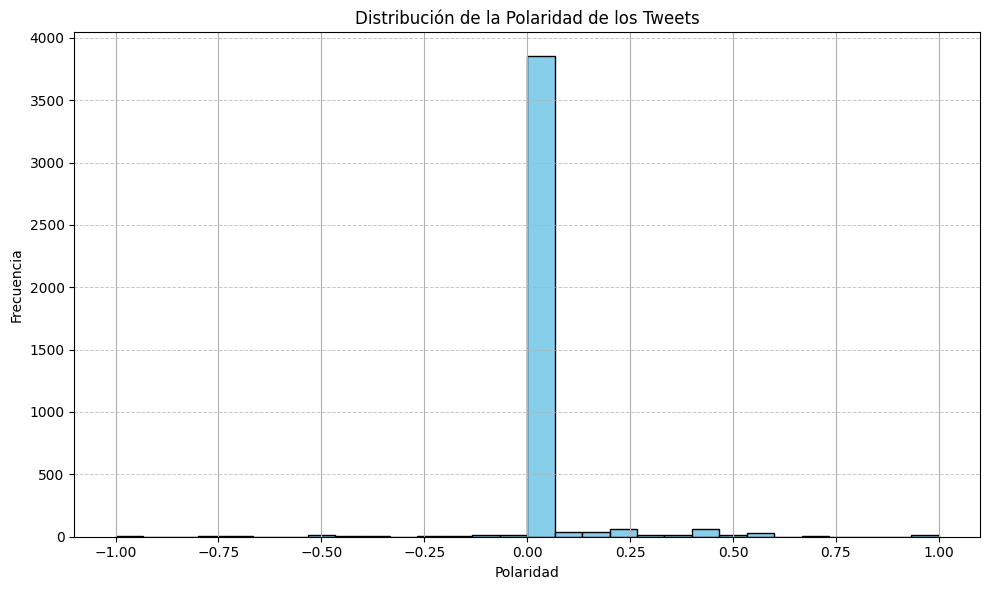

In [11]:
# Visualizar la distribución de la polaridad con un histograma
plt.figure(figsize=(10, 6))
bernardo['polarity'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la Polaridad de los Tweets')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


Al observar el histograma de los tweets de Bernardo Arevalo se puede observar que la mayoria de los tweets estan en un rango de 0.0 a 0.25 de positividad. Sin embargo estan muy cerca del 0, por lo que se puede decir que son neutrales.

In [12]:
# Calculate the 90th percentile for 'retweetCount', 'likeCount', and 'replyCount'
percentiles = bernardo[['retweetCount', 'likeCount', 'replyCount']].quantile(0.9).to_dict()
percentiles


{'retweetCount': 26.90000000000009, 'likeCount': 140.0, 'replyCount': 7.0}

In [13]:
# Filter the dataframe for tweets that surpass the 90th percentile in at least two of the three metrics
influencer_tweets = bernardo[
    ((bernardo['retweetCount'] > percentiles['retweetCount']) +
     (bernardo['likeCount'] > percentiles['likeCount']) +
     (bernardo['replyCount'] > percentiles['replyCount'])) >= 2
]

# Extract the user information for these tweets
influencer_users = influencer_tweets['user'].tolist()

# Extract unique influencer usernames and their details
unique_influencers = {}
for user_info in influencer_users:
    user_id = user_info['id']
    if user_id not in unique_influencers:
        unique_influencers[user_id] = {
            "username": user_info['username'],
            "displayname": user_info['displayname'],
            "url": user_info['url']
        }

# Convert to a DataFrame for better presentation
influencer_df = pd.DataFrame(unique_influencers.values())
print("Los influencers son:")
influencer_df


Los influencers son:


""


- Como se puede ver no hay influencers que cumplan con al menos 2 de las 3 condiciones planteadas para este estudio, por lo que se puede decir que no hay un influencer en la red.

In [14]:
# Extract the tweets that are direct interactions with Bernardo Arévalo
direct_interactions = bernardo[bernardo['inReplyToUser'].apply(lambda x: isinstance(x, dict) and x['username'] == 'BArevalodeLeon')]

# Extract the tweets that mention Bernardo Arévalo but are not direct interactions
indirect_interactions = bernardo[
    (bernardo['rawContent'].str.contains('BArevalodeLeon', case=False)) & 
    ~(bernardo['id'].isin(direct_interactions['id']))
]

# Count the number of direct and indirect interactions
direct_count = len(direct_interactions)
indirect_count = len(indirect_interactions)

print("Interacciones directas:",direct_count)
print("Interacciones indirectas:",indirect_count)


Interacciones directas: 0
Interacciones indirectas: 2643


Como no se encontraron interacciones directas con Bernardo Arevalo se puede decir que la red es principalmente distribuida.

#### Analisis de Sandra

In [15]:

total_tweets = len(sandra)

# Estadísticas básicas para respuestas, retweets y favoritos
descriptive_stats = sandra[['replyCount', 'retweetCount', 'likeCount']].describe()

print("Tweets totales", total_tweets)
descriptive_stats

Tweets totales 5784


,replyCount,retweetCount,likeCount
count,5784.000000,5784.000000,5784.000000
mean,19.563797,38.411307,185.464039
std,203.854820,341.966503,1910.616422
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,1.000000,1.000000,7.000000
max,8610.000000,13099.000000,84045.000000


In [17]:
from textblob import TextBlob

# Función para obtener la polaridad del texto
def get_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0.0

# Aplicar la función a la columna 'rawContent' para obtener la polaridad de cada tweet
sandra['polarity'] = sandra['rawContent'].apply(get_polarity)

# Calculamos la media de la polaridad
average_polarity = sandra['polarity'].mean()

average_polarity

0.014324214097094334

En el caso de Sandra se puede observar que la mayoria de los tweets son neutrales, pero estan un poco sesgados a la positividad con un valor de 0.014 de positividad.

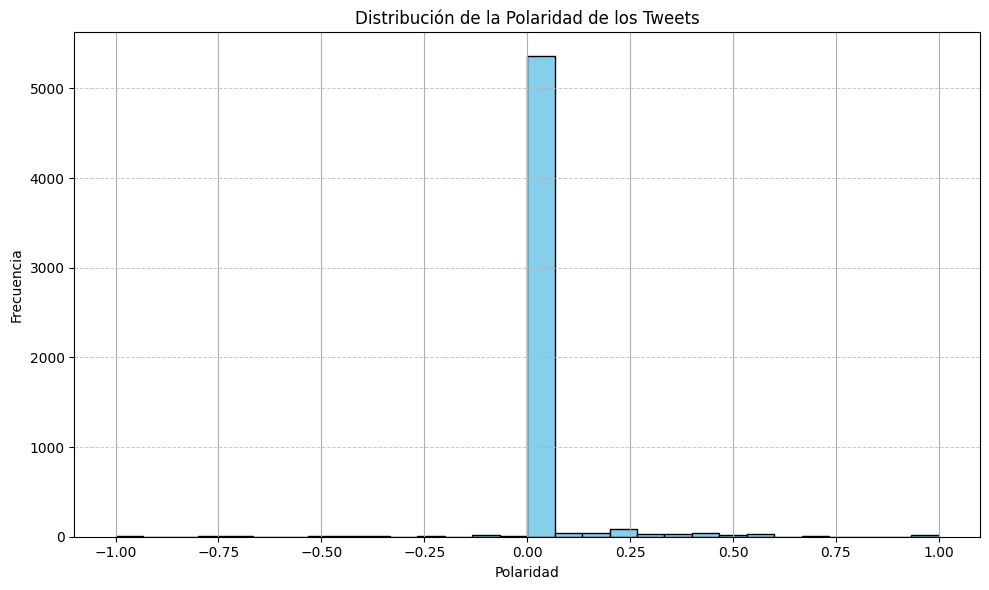

In [19]:
# Visualizar la distribución de la polaridad con un histograma
plt.figure(figsize=(10, 6))
sandra['polarity'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la Polaridad de los Tweets')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

En el caso de Sandra se puede observar que la mayoria de los tweets muestra una polaridad de 0. Sin embargo se presentan algunos tweets con una polaridad de 0.25 y 0.5.

In [20]:
percentiles = sandra[['retweetCount', 'likeCount', 'replyCount']].quantile(0.9).to_dict()
percentiles

{'retweetCount': 24.0, 'likeCount': 127.0, 'replyCount': 6.0}

In [21]:
# Filter the dataframe for tweets that surpass the 90th percentile in at least two of the three metrics
influencer_tweets = sandra[
    ((sandra['retweetCount'] > percentiles['retweetCount']) +
     (sandra['likeCount'] > percentiles['likeCount']) +
     (sandra['replyCount'] > percentiles['replyCount'])) >= 2
]

# Extract the user information for these tweets
influencer_users = influencer_tweets['user'].tolist()

# Extract unique influencer usernames and their details
unique_influencers = {}
for user_info in influencer_users:
    user_id = user_info['id']
    if user_id not in unique_influencers:
        unique_influencers[user_id] = {
            "username": user_info['username'],
            "displayname": user_info['displayname'],
            "url": user_info['url']
        }

# Convert to a DataFrame for better presentation
influencer_df = pd.DataFrame(unique_influencers.values())
print("Los influencers son:")
influencer_df

Los influencers son:


""


Al evaluar los criterios planteados en para determinar si existen no existen registros de usuarios que cumplan con al menos 2 de las 3 condiciones planteadas para este estudio, por lo que se puede decir que no hay un influencer en la red.

In [31]:
# Extract the tweets that are direct interactions with Bernardo Arévalo
direct_interactions = sandra[sandra['inReplyToUser'].apply(lambda x: isinstance(x, dict) and x['username'] == 'SandraTorresGUA')]

# Extract the tweets that mention Bernardo Arévalo but are not direct interactions
indirect_interactions = sandra[
    (sandra['rawContent'].str.contains('SandraTorresGUA', case=False)) & 
    ~(sandra['id'].isin(direct_interactions['id']))
]

# Count the number of direct and indirect interactions
direct_count = len(direct_interactions)
indirect_count = len(indirect_interactions)

print("Interacciones directas:",direct_count)
print("Interacciones indirectas:",indirect_count)

Interacciones directas: 0
Interacciones indirectas: 852


Al observar las interacciones con Sandra se puede observar que la red es principalmente distribuida. Esto se debe a que no se cuenta con ningun con ninguna interaccion directa con Sandra.

- Despues de analizar los tweets hechos con durante la campaña de ambos candidatos fueron neutrales, ademas de que no se encontro rastro de algun influencer en los tweets. Esto indica que la presencia de ambos candidatos en las redes sociales no fue muy influyente en cuanto a los resultados finales de las elecciones. 